In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# ODE
f = lambda t, s : np.exp(-t)  # f here is the derivative term
h = 0.1      # delta(t)
t0 = 0
tf = 1
t = np.arange(t0, tf+h, h)

# Initial condition 
z0 = -1

In [19]:
def Euler_predictor(f, t, h, s0):
    s = np.zeros(len(t))
    s[0] = s0
    
    for i in range(len(t)-1):
        s[i+1] = s[i] + h*f(t[i], s[i])
        
    return s

In [20]:
z = Euler_predictor(f, t, h, z0)

In [21]:
def midpoint_pred(f, t, h, s):
    m = np.zeros(len(s))
        
    for i in range(len(s)-1):
        m[i] = s[i] + (h/2)*f(t[i], s[i])
        
    return m

In [22]:
midpoint_array = midpoint_pred(f, t, h, z)

In [29]:
def corrector_fun(f, t, h, m, s):
    x = np.zeros(len(s))
    x[0] = s[0]
    
    for i in range(len(s) -1):
        x[i+1] = x[i] + h* f(t[i]+(h/2), m[i])
        
    return x
# x is the position vector, obtained with the array from midpoint

In [30]:
x_corrector = corrector_fun(f, t, h, midpoint_array, z)

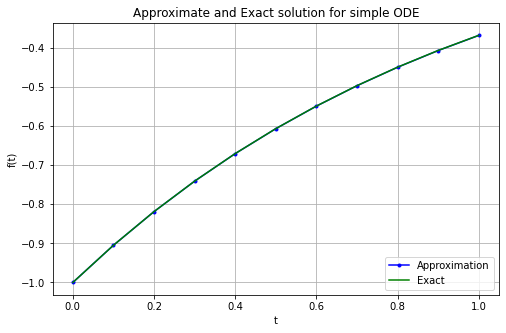

In [31]:
plt.figure(figsize = (8,5))
plt.plot(t, x_corrector, "b.-", label = "Approximation")
plt.plot(t, -np.exp(-t), "g", label = "Exact")
plt.title("Approximate and Exact solution for simple ODE")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid()
plt.legend(loc = "lower right")